<a href="https://colab.research.google.com/github/louisowen6/NLP_Stacking_Ensemble/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [0]:
!pip install stanfordnlp
!pip install nltk
!pip install contractions
!pip install textsearch

     |████████████████████████████████| 163kB 2.8MB/s 
     |████████████████████████████████| 245kB 3.9MB/s 
     |████████████████████████████████| 317kB 49.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=d49186c401835ad37261121208ce580a50b25944a8f61ca86c554ebb3e255671
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


# Import Packages

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import re
import json
import math
import string
import numpy as np
from bs4 import BeautifulSoup
import gensim

import contractions
import inflect
import string

import stanfordnlp
stanfordnlp.download('en') 
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.tokenize import wordpunct_tokenize,TweetTokenizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tag.stanford import StanfordNERTagger

from scipy import sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from textblob import TextBlob

from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
sns.set()

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:33<00:00, 6.88MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Mount the Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Import Supporting Files

In [0]:
#Stanford Ner
link ='https://drive.google.com/open?id=1nqXmQjgP8s_j0LB9bAkU3_NfS7LXr_j3'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ner-model-english.ser.gz')  

link ='https://drive.google.com/open?id=13eDT8egtCeZ_eER6FbyX-BNtsMp8dVZq'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('stanford-ner.jar')  


#Abbreviation & Slang Dict
link ='https://drive.google.com/open?id=1ptzEljjFTQNF3FRR9wO9G7D0I9DWwjQR'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('abbreviation_dict.txt')  
abb_df = pd.read_table('abbreviation_dict.txt', sep='\s+', names=('Abbreviation', 'Normal'))
abb=pd.Series(abb_df['Normal'])
abb.index=abb_df['Abbreviation']
abb_dict=dict(abb)


#AFINN Lexicon
link ='https://drive.google.com/open?id=1EBMSCSqU9CjipfA5JqAIWBIt3wavtEXx'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AFINN-111.txt')  
AFINN_df = pd.read_table('AFINN-111.txt', names=('Word', 'Sentiment'))
AFINN=pd.Series(AFINN_df['Sentiment'])
#Rescaling in [-1,1]
AFINN=((AFINN-AFINN.min())/(AFINN.max()-AFINN.min()))*(1-(-1))+(-1)
AFINN.index=AFINN_df['Word']
AFINN_dict=dict(AFINN)


#BING-LIU Lexicon
link ='https://drive.google.com/open?id=1j0FeouVrdlVvlE6DX7_j3MAnZn0Sxtf_'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('POS_words.txt')  
pos = pd.read_table('POS_words.txt',names='P')

link ='https://drive.google.com/open?id=1AT9H4qfOt_E9_G0YzcmPVBXNaZgXs5tz'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NEG_words.txt')  
neg=pd.read_table('NEG_words.txt',names='N',encoding='latin-1')

BingLiu_dict={'pos':pos['P'].tolist(),'neg':neg['N'].tolist()}


#General Inquirer Lexicon
link ='https://drive.google.com/open?id=16DrsetxPi8oPB5q47Y7Xd8NgyGvh0Q1a'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('General_Inquirer.csv')  
General_Inquirer_df=pd.read_csv('General_Inquirer.csv',index_col='Entry')
General_Inquirer_df=General_Inquirer_df[['Positiv','Negativ']]

General_Inquirer_dict={'pos':General_Inquirer_df[pd.isnull(General_Inquirer_df['Positiv'])==False]['Positiv'].index.tolist(),
                      'neg':General_Inquirer_df[pd.isnull(General_Inquirer_df['Negativ'])==False]['Positiv'].index.tolist()}


#NRC Hashtag Sentiment Lexicon
link ='https://drive.google.com/open?id=1-Q1gm2SsbKgo-80_FXxCh8SNRK5eyPpl'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('HS-unigrams.txt')  
hs=pd.read_table('HS-unigrams.txt',names=('Hashtag','PMI(w, pos) -PMI(w, neg)','n_pos','n_neg'),encoding='latin-1')
hs=hs[pd.isnull(hs.Hashtag)==False]
#Rescaling in [-1,1]
hs['PMI(w, pos) -PMI(w, neg)']=((hs['PMI(w, pos) -PMI(w, neg)']-hs['PMI(w, pos) -PMI(w, neg)'].min())/(hs['PMI(w, pos) -PMI(w, neg)'].max()-hs['PMI(w, pos) -PMI(w, neg)'].min()))*(1-(-1))+(-1)
nrc=hs['PMI(w, pos) -PMI(w, neg)']
nrc.index=hs['Hashtag']

NRC_hashtag_dict=dict(nrc)


# #MPQA Wordnet Lexicon
# link ='https://drive.google.com/open?id=1azF5UGWVHXjKC2wkOxIHYK2I92AaEztj'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('gold_standard.txt')  
# MPQA=pd.read_table('gold_standard.txt',names=('synset_offset','type','synset','gloss'),encoding='latin-1')


#SentiWordNet
link ='https://drive.google.com/open?id=1S2wLuyU03n_lHK0iCzWAXO7IT9hrzFpf'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('senti_wordnet.txt')  
sentiwordnet=pd.read_table('senti_wordnet.txt',names=('POS','ID','PosScore','NegScore','SynsetTerms','Gloss'),encoding='latin-1')
sentiwordnet=sentiwordnet[pd.isnull(sentiwordnet.POS)==False]
sentiwordnet['score']=sentiwordnet['PosScore']-sentiwordnet['NegScore']

#Google Word2Vec Pretrained Model
link ='https://drive.google.com/open?id=16A169DxZ-h9qU0i6rXCoSh_djkBWnd9V'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GoogleNews-vectors-negative300.bin')   
model_w2v = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

#GloVe Pretrained Model
link ='https://drive.google.com/open?id=1p1IN9O_fpSQzPTFB5Y8CCOMXPIPU1WGV'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('glove.twitter.27B.200d.txt')   
def loadGloveModel(gloveFilePath):
    print("Loading Glove Model")
    f = open(gloveFilePath,'r',encoding='utf-8')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model
model_GloVe=loadGloveModel('glove.twitter.27B.200d.txt')

1nqXmQjgP8s_j0LB9bAkU3_NfS7LXr_j3
13eDT8egtCeZ_eER6FbyX-BNtsMp8dVZq
1ptzEljjFTQNF3FRR9wO9G7D0I9DWwjQR
1EBMSCSqU9CjipfA5JqAIWBIt3wavtEXx
1j0FeouVrdlVvlE6DX7_j3MAnZn0Sxtf_
1AT9H4qfOt_E9_G0YzcmPVBXNaZgXs5tz
16DrsetxPi8oPB5q47Y7Xd8NgyGvh0Q1a


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1-Q1gm2SsbKgo-80_FXxCh8SNRK5eyPpl
1S2wLuyU03n_lHK0iCzWAXO7IT9hrzFpf
16A169DxZ-h9qU0i6rXCoSh_djkBWnd9V


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


1p1IN9O_fpSQzPTFB5Y8CCOMXPIPU1WGV
Loading Glove Model
Done. 1193514  words loaded!


# Importing Data

In [0]:
link ='https://drive.google.com/open?id=1szYV-zxOuHUWf2RlIKuvZD3qLccRmKO-'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Microblog_Train_twitter_full.json')  
with open('Microblog_Train_twitter_full.json') as train_file:
    dict_train = json.load(train_file)
microblog_train_twitter_full = pd.DataFrame.from_dict(dict_train)

1szYV-zxOuHUWf2RlIKuvZD3qLccRmKO-


In [0]:
link ='https://drive.google.com/open?id=1hsmjwP7FiDAkq4hgWbjVTUJ9fY1yKEyc'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Microblog_Train_stocktwits_full.json')  
with open('Microblog_Train_stocktwits_full.json') as train_file:
    dict_train = json.load(train_file)
microblog_train_stocktwits_full = pd.DataFrame.from_dict(dict_train)


1hsmjwP7FiDAkq4hgWbjVTUJ9fY1yKEyc


# Rebuild Data

In [0]:
twitter_df=microblog_train_twitter_full[['cashtag','sentiment score','spans','text','created_at']].copy()
twitter_df['source']=['twitter' for x in range(len(twitter_df))] #add source column
twitter_df['created_at']=pd.to_datetime(twitter_df['created_at']).apply(lambda x: '[0am,9am)' 
                                                                        if (x.hour>=0 and x.hour<9) else '[9am,3pm)' 
                                                                        if (x.hour>=9 and x.hour<15) else '[3pm,24pm)')  #encoding time created

In [0]:
stocktwits_df=microblog_train_stocktwits_full[['cashtag','sentiment score','spans']].copy()

stocktwits_message= microblog_train_stocktwits_full['message'].apply(pd.Series) #message data
stocktwits_user=stocktwits_message['user'].apply(pd.Series) #user data

stocktwits_df['text']=stocktwits_message['body']
stocktwits_df['created_at']=stocktwits_message['created_at']
stocktwits_df['source']=microblog_train_stocktwits_full['source']
stocktwits_df['official_account']=stocktwits_user['official']
stocktwits_df['sentiment']=stocktwits_message['entities'].apply(pd.Series)['sentiment'].apply(lambda x : x['basic'] if (type(x) is dict) else np.nan)
stocktwits_df['liked_by_self']=stocktwits_message['liked_by_self']
stocktwits_df['conversation_parent']=stocktwits_message['conversation'].apply(lambda x : x['parent'] if (type(x) is dict) else np.nan)
stocktwits_df['conversation_replies']=stocktwits_message['conversation'].apply(lambda x : x['replies'] if (type(x) is dict and not math.isnan(x['replies'])) else 0)
stocktwits_df['conversation_replies']=stocktwits_df['conversation_replies'].apply(lambda x: (x-min(stocktwits_df['conversation_replies']))/(max(stocktwits_df['conversation_replies'])-min(stocktwits_df['conversation_replies']))) #min-max scaling
stocktwits_df['total_likes']=stocktwits_message['likes'].apply(lambda x : x['total'] if (type(x) is dict and not math.isnan(x['total'])) else 0)
stocktwits_df['total_likes']=stocktwits_df['total_likes'].apply(lambda x: (x-min(stocktwits_df['total_likes']))/(max(stocktwits_df['total_likes'])-min(stocktwits_df['total_likes']))) #min-max scaling
stocktwits_df['created_at']=pd.to_datetime(stocktwits_df['created_at']).apply(lambda x: '[0am,9am)' 
                                                                              if (x.hour>=0 and x.hour<9) else '[9am,3pm)' 
                                                                              if (x.hour>=9 and x.hour<15) else '[3pm,24pm)') #encoding time created

In [0]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 6 columns):
cashtag            535 non-null object
sentiment score    535 non-null object
spans              535 non-null object
text               535 non-null object
created_at         535 non-null object
source             535 non-null object
dtypes: object(6)
memory usage: 25.2+ KB


In [0]:
stocktwits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 12 columns):
cashtag                 934 non-null object
sentiment score         934 non-null object
spans                   934 non-null object
text                    919 non-null object
created_at              934 non-null object
source                  934 non-null object
official_account        919 non-null object
sentiment               162 non-null object
liked_by_self           919 non-null object
conversation_parent     163 non-null object
conversation_replies    934 non-null float64
total_likes             934 non-null float64
dtypes: float64(2), object(10)
memory usage: 87.6+ KB


In [0]:
#convert to numeric
twitter_df['sentiment score']=pd.to_numeric(twitter_df['sentiment score'])
stocktwits_df['sentiment score']=pd.to_numeric(stocktwits_df['sentiment score'])

#One hot encoding
stocktwits_df['official_account']=stocktwits_df['official_account'].apply(lambda x: 1 if x==True else 0 if x==False else x)
stocktwits_df['liked_by_self']=stocktwits_df['liked_by_self'].apply(lambda x: 1 if x==True else 0 if x==False else x)
stocktwits_df['conversation_parent']=stocktwits_df['conversation_parent'].apply(lambda x: 1 if x==True else 0 if x==False else x)

In [0]:
#Concatenate both dataframe
concat_df=pd.concat([stocktwits_df,twitter_df])
concat_df=concat_df[pd.isnull(concat_df.text)==False]
concat_df=concat_df.reset_index()

# Data Cleaning

In [0]:
#Inspired by: 
# https://www.dotnetperls.com/punctuation-python
# https://github.com/tthustla/twitter_sentiment_analysis_part1/blob/master/Capstone_part2.ipynb
# https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py

#Word ordinal encoding
p = inflect.engine()
word_to_number_mapping = {}
for i in range(1, 2000):
  word_form = p.number_to_words(i)  # 1 -> 'one'
  ordinal_word = p.ordinal(word_form)  # 'one' -> 'first'
  ordinal_number = p.ordinal(i)  # 1 -> '1st'
  word_to_number_mapping[ordinal_word] = ordinal_number  # 'first': '1st'
  
  
def elongated_word(word):
    """
     Replaces an elongated word with its basic form, unless the word exists in the lexicon 
     """
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if (len(word)>2 and word[0] != '$'):#if not Stock Market symbol
      if wn.synsets(word):
          return word
      repl_word = repeat_regexp.sub(repl, word)
      if repl_word != word:      
          return elongated_word(repl_word)
      else:       
          return repl_word
    else:
      return word
    
def isfloat(value):
  ''' 
  Check if value is float or not
  '''
  try:
    float(value)
    return True
  except ValueError:
    return False

def tokenize(sentence):
  '''
  tokenize input sentence into token
  '''
  token_list=nltk.regexp_tokenize(sentence, pattern=r"\s|[\.,;]\D", gaps=True)
  return(token_list)

def sentences_cleaner(sentence):
  '''
  clean input sentence  
  '''
    try:
      mention_pat= r'@[A-Za-z0-9_]+'
      mention_2_pat=r'@[A-Za-z0-9_]+:\s'
      retweet_pat=r'^RT +'
      dollars_pat=r'\$ +'
      http_pat = r'https?://[^ ]+'
      www_pat = r'www.[^ ]+'
      apos_pat=r'"+|"$|"+"$'
      
      soup = BeautifulSoup(sentence, 'lxml')
      souped = soup.get_text()
    
      #HTML decoding remove BOM
      try:
          bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
      except:
          bom_removed = souped
          
      #Delete mention
      stripped = re.sub(mention_2_pat,"", bom_removed)
      stripped = re.sub(mention_pat,"", stripped)
      
      #Delete retweet
      stripped=re.sub(retweet_pat,"",stripped)
      
      #Transform any url into '_url'
      stripped = re.sub(http_pat, '_url', stripped)
      stripped = re.sub(www_pat, '_url', stripped)
    
      #Transfrom abbreviation & slang word  into normal words based on abb_dict corpus
      abbreviation_handled=' '.join(pd.Series(stripped.split()).apply(lambda x: abb_dict[x] if x in abb_dict.keys() else x).to_list())
   
      #Transform contracted words into normal words
      contraction_handled =contractions.fix(abbreviation_handled)
      
      #Join the stock symbol
      dollars_handled=re.sub(dollars_pat,'$',contraction_handled)
      
      #Transform elongated words into normal words
      elongated_handled=' '.join(pd.Series(dollars_handled.split()).apply(lambda x: elongated_word(x[:-1])+x[-1] if (x[-1] in string.punctuation and not isfloat(x)) else elongated_word(x) if not isfloat(x) else x))
      
      #Transform ordinal number
      ordinal_handled=' '.join(pd.Series(elongated_handled.split()).apply(lambda x: word_to_number_mapping[x.lower()] if x.lower() in word_to_number_mapping.keys() else x))
      
      #Remove unnecesary apostrophes 
      apos_handled=re.sub(apos_pat,'',ordinal_handled)
      
      #Split Last Word Punctuation
      wordpunct=wordpunct_tokenize(apos_handled)
      if (len(wordpunct[-1])>1 and wordpunct[-1][-1] in string.punctuation and wordpunct[-2] not in string.punctuation) or (wordpunct[-1] in string.punctuation and wordpunct[-2] not in string.punctuation):
        words =tokenize(apos_handled)
        words[-1]=wordpunct[-2]
        words.append(wordpunct[-1])
      else:
        words =tokenize(apos_handled)

      return (" ".join(words)).strip()
    except:
      return sentence

In [0]:
concat_df['clean_text']=concat_df['text'].apply(lambda x: sentences_cleaner(x))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/lPF2fBX26z" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [0]:
print('BEFORE CLEANING: {}'.format(concat_df.loc[81,'text']))
print()
print('AFTER CLEANING: {}'.format(sentences_cleaner(concat_df.loc[81,'text'])))

BEFORE CLEANING: RT @Montisumo Down day for all biotechs Good to load up Be confident. $ONTY $CHTP $AIS $HGSI $DNDN &gt;&gt; Agreed $IBB $XBI all same downness

AFTER CLEANING: Down day for all biotechs Good to load up Be confident $ONTY $CHTP $AIS $HGSI $DNDN >> Agreed $IBB $XBI all same downes


In [0]:
print('BEFORE CLEANING: {}'.format(concat_df.loc[918,'text']))
print()
print('AFTER CLEANING: {}'.format(sentences_cleaner(concat_df.loc[918,'text'])))

BEFORE CLEANING: $BBRY nice bounce

AFTER CLEANING: $BBRY nice bounce


In [0]:
print('BEFORE CLEANING: {}'.format(stocktwits_df.loc[43,'text']))
print()
print('AFTER CLEANING: {}'.format(sentences_cleaner(stocktwits_df.loc[43,'text'])))

BEFORE CLEANING: @joekidd lost 600 in like 3 days for my $C investment. Sure wish bad news came out just a few days earlier. Think I&#39;ll go over to Russia!

AFTER CLEANING: lost 600 in like 3 days for my $C investment Sure wish bad news came out just a few days earlier Think I will go over to Russia !


In [0]:
print('BEFORE CLEANING: {}'.format("RT $  FB TOMORROW IS MY FIRST BIG WINNNN!!!! #XOXO Trust me it will go up 50.78%!!! #MYWIN"))
print()
print('AFTER CLEANING: {}'.format(sentences_cleaner("RT $  FB TOMORROW IS MY FIRST BIG WINNNN!!!! #XOXO Trust me it will go up 50.78%!!! #MYWIN")))

BEFORE CLEANING: RT $  FB TOMORROW IS MY FIRST BIG WINNNN!!!! #XOXO Trust me it will go up 50.78%!!! #MYWIN

AFTER CLEANING: $FB TOMORROW IS MY 1st BIG WIN!!!! #XOXO Trust me it will go up 50.78%!!! #MYWIN


# Clean Data

In [0]:
concat_df.tail(5)

,index,cashtag,conversation_parent,conversation_replies,created_at,liked_by_self,official_account,sentiment,sentiment score,source,spans,text,total_likes,clean_text
1449,530,$SBUX,NaN,NaN,"[3pm,24pm)",NaN,NaN,NaN,0.220,twitter,[brings upscale concept],.@Starbucks brings upscale concept to @Midtown...,NaN,brings upscale concept to _url $SBUX
1450,531,$AAPL,NaN,NaN,"[3pm,24pm)",NaN,NaN,NaN,0.365,twitter,[looking for a sharp move up in equities],On #FEDDAY looking for a sharp move up in equi...,NaN,On #FEDAY looking for a sharp move up in equit...
1451,532,$AAPL,NaN,NaN,"[9am,3pm)",NaN,NaN,NaN,0.435,twitter,[#OwnItDon'tTradeIt],Either you're a trader or an investor. $AAPL i...,NaN,Either you are a trader or an investor $AAPL i...
1452,533,$PSXP,NaN,NaN,"[0am,9am)",NaN,NaN,NaN,0.414,twitter,[TOP 5 STOCK PICKS],TOP 5 STOCK PICKS FOR TUESDAY 04/12/16 1) $CNS...,NaN,TOP 5 STOCK PICKS FOR TUESDAY 04/12/16 1) $CNS...
1453,534,$TSLA,NaN,NaN,"[9am,3pm)",NaN,NaN,NaN,0.230,twitter,"[Long, buying point]",Long $TQQQ at 104.15 with stop/loss below 1.5%...,NaN,Long $TQQQ at 104.15 with stop/los below 1.5% ...


# Feature Engineering

## Function Definition

In [0]:
#dictionary that contains pos tags and their explanations
# 'CC': 'coordinating conjunction','CD': 'cardinal digit','DT': 'determiner',
# 'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
# 'FW': 'foreign word','IN':  'preposition/subordinating conjunction','
# JJ': 'adjective \'big\'','JJR': 'adjective, comparative \'bigger\'',
# 'JJS': 'adjective, superlative \'biggest\'', 'LS': 'list marker 1)', 'MD': 'modal could, will',
# 'NN': 'noun, singular \'desk\'', 'NNS': 'noun plural \'desks\'',
#'NNP': 'proper noun, singular \'Harrison\'','NNPS': 'proper noun, plural \'Americans\'',
# 'PDT': 'predeterminer \'all the kids\'','POS': 'possessive ending parent\'s',
# 'PRP': 'personal pronoun I, he, she','PRP$': 'possessive pronoun my, his, hers',
# 'RB': 'adverb very, silently,', 'RBR': 'adverb, comparative better',
# 'RBS': 'adverb, superlative best','RP': 'particle give up', 'TO': 'to go \'to\' the store.',
# 'UH': 'interjection errrrrrrrm','VB': 'verb, base form take','VBD': 'verb, past tense took',
# 'VBG': 'verb, gerund/present participle taking','VBN': 'verb, past participle taken',
# 'VBP': 'verb, sing. present, non-3d take','VBZ': 'verb, 3rd person sing. present takes',
# 'WDT': 'wh-determiner which','WP': 'wh-pronoun who, what','WP$': 'possessive wh-pronoun whose',
# 'WRB': 'wh-abverb where, when','QF' : 'quantifier, bahut, thoda, kam (Hindi)',
# 'VM' : 'main verb','PSP' : 'postposition, common in indian langs','DEM' : 'demonstrative, common in indian langs'

#Extract Parts of Speech as BOW
def extract_pos(doc):
#   pos_dict = {'CC':0, 'CD':0,'DT':0,'EX':0,'FW':0,'JJ':0,'JJR':0,'JJS':0,'LS':0,'MD':0,
#                 'NN':0,'NNS':0,'NNP':0,'NNPS':0,'PDT':0,'POS':0,'PRP':0,'PRP$':0,'RB':0,
#                 'RBR':0,'RBS':0,'RP':0,'TO':0,'UH':0,'VB':0,'VBD':0,'VBG':0,'VBN':0,'VBP':0,
#                 'VBZ':0,'VM':0,'WDT':0,'WP':0,'WP$':0,'WRB':0,'QF':0,'PSP':0,'DEM':0}
  pos_dict = {'VB':0,'VBD':0,'VBG':0,'VBN':0,'VBP':0,'VBZ':0,'VM':0}
  try:
    for sent in doc.sentences:
      for wrd in sent.words:
        if wrd.pos in pos_dict.keys():
          pos_dict[wrd.pos]+=1
    #return BOW of POS
    return pos_dict
  except:
    return pos_dict
  
  
def n_grams_handled(sentence):
  '''
  Filter before generate n-gram
  '''
  try:
    tk=TweetTokenizer()
    cashtag_pat=r'\$[^\s]+'
    hashtag_pat=r'#([^\s]+)'
    word_number_pat=r'\w*\d\w*'
  
    #Remove word which has length < 2
    stripped=' '.join([word for word in sentence.split() if len(word)>=2])
  
    #Remove hashtag
    hashtag_handled= re.sub(hashtag_pat,"", stripped)
  
    #Remove cashtag
    cashtag_handled= re.sub(cashtag_pat,"", hashtag_handled)
    
    #Remove word with number
    number_handled= re.sub(word_number_pat,"", cashtag_handled)
  
    #Remove unnecesary white spaces
    words = tk.tokenize(number_handled)
    words = [x for x in words if x not in string.punctuation]
    clean_sentence=(" ".join(words)).strip()
    return  clean_sentence
  except:
    return sentence

def rf_ngram(df,gram): 
  '''
  create rf-ngram
  '''
  def sentence_sparse(sentence,gram,rf_ngram,sparse_rf_ngram):
    #Initiate Linke List Sparse Matrix
    zero_sparse=sp.lil_matrix( (1,len(rf_ngram)), dtype=float)
    #Assign Value of rf_ngram to each word in sentence
    splitted_text=tokenize(n_grams_handled(sentence))
    #Unigram
    if gram==1:
      for word in splitted_text:
        if word in rf_ngram.index:
          zero_sparse[0,rf_ngram.index.get_loc(word)]+=sparse_rf_ngram[0,rf_ngram.index.get_loc(word)]
      #Convert LinkedList Sparse Matrix into CSR Sparse Matrix
      sparse=zero_sparse.tocsr()
    #Bigram
    elif gram==2:
      bigram=lambda x: splitted_text[x]+' '+splitted_text[x+1]
      it_2_gram=range(len(splitted_text)-1)
      for i in it_2_gram:
        if bigram(i) in rf_ngram.index:
          zero_sparse[0,rf_ngram.index.get_loc(bigram(i))]+=sparse_rf_ngram[0,rf_ngram.index.get_loc(bigram(i))]
      #Convert LinkedList Sparse Matrix into CSR Sparse Matrix
      sparse=zero_sparse.tocsr()
    #Trigram
    elif gram==3:
      trigram=lambda x: splitted_text[x]+' '+splitted_text[x+1]+' '+splitted_text[x+2]
      it_3_gram=range(len(splitted_text)-2)
      for i in it_3_gram:
        if trigram(i) in rf_ngram.index:
          zero_sparse[0,rf_ngram.index.get_loc(trigram(i))]+=sparse_rf_ngram[0,rf_ngram.index.get_loc(trigram(i))]
      #Convert LinkedList Sparse Matrix into CSR Sparse Matrix
      sparse=zero_sparse.tocsr()
    #4grams
    elif gram==4:
      fourgram=lambda x: splitted_text[x]+' '+splitted_text[x+1]+' '+splitted_text[x+2]+' '+splitted_text[x+3]
      it_4_gram=range(len(splitted_text)-3)
      for i in it_4_gram:
        if fourgram(i) in rf_ngram.index:
          zero_sparse[0,rf_ngram.index.get_loc(fourgram(i))]+=sparse_rf_ngram[0,rf_ngram.index.get_loc(fourgram(i))]
      #Convert LinkedList Sparse Matrix into CSR Sparse Matrix
      sparse=zero_sparse.tocsr()
    return(sparse)

  BOW_df= pd.DataFrame(columns=['pos','neutral','neg'])
  words_set = set()
  
  #Creating the rf_ngram dictionary of words
  it=range(len(df))
  for i in it:
    score=df.loc[i,'sentiment score']
    if score>0:
      score='pos'
    elif score<0:
      score='neg'
    else:
      score='neutral'
    try:
      text=df.loc[i,'clean_text']
      cleaned_text=n_grams_handled(text)
      splitted_text=tokenize(cleaned_text)
      if gram==1:
        for word in splitted_text:
          if word not in words_set:#check if this word already counted or not in the full corpus
            words_set.add(word)
            BOW_df.loc[word] = [0,0,0]
            BOW_df.loc[word,score]+=1
          else:
            BOW_df.loc[word,score]+=1
      elif gram==2:
        it_2_gram=range(len(splitted_text)-1)
        bigram=lambda x: splitted_text[x]+' '+splitted_text[x+1]
        for i in it_2_gram:
          if bigram(i) not in words_set:
            words_set.add(bigram(i))
            BOW_df.loc[bigram(i)] = [0,0,0]
            BOW_df.loc[bigram(i),score]+=1
          else:
            BOW_df.loc[bigram(i),score]+=1
      elif gram==3:
        it_3_gram=range(len(splitted_text)-2)
        trigram=lambda x: splitted_text[x]+' '+splitted_text[x+1]+' '+splitted_text[x+2]
        for i in it_3_gram:
          if trigram(i) not in words_set:
            words_set.add(trigram(i))
            BOW_df.loc[trigram(i)] = [0,0,0]
            BOW_df.loc[trigram(i),score]+=1
          else:
            BOW_df.loc[trigram(i),score]+=1
      elif gram==4:
        it_4_gram=range(len(splitted_text)-3)
        fourgram=lambda x: splitted_text[x]+' '+splitted_text[x+1]+' '+splitted_text[x+2]+' '+splitted_text[x+3]
        for i in it_4_gram:
          if fourgram(i) not in words_set:
            words_set.add(fourgram(i))
            BOW_df.loc[fourgram(i)] = [0,0,0]
            BOW_df.loc[fourgram(i),score]+=1
          else:
            BOW_df.loc[fourgram(i),score]+=1 
    except:
      None
  #Calculate rf_ngram for each word
  series_1=pd.Series([1 for x in range(len(BOW_df))])
  series_1.index=BOW_df.index
  series_2=pd.Series([2 for x in range(len(BOW_df))])
  series_2.index=BOW_df.index
  frac_1=np.log(series_2+(BOW_df['pos']/pd.concat([series_1,BOW_df['neg']],1).max(axis=1)))
  frac_2=np.log(series_2+(BOW_df['neg']/pd.concat([series_1,BOW_df['pos']],1).max(axis=1)))
  rf_ngram_series= pd.concat([frac_1,frac_2],1).max(axis=1)
  sparse_rf_ngram=sp.csr_matrix(rf_ngram_series)

  rf_ngram_avg_list=df['clean_text'].apply(lambda x: np.mean([i for i in sentence_sparse(x,gram,rf_ngram_series,sparse_rf_ngram).toarray()[0].tolist() if i!=0]) if type(x)==str else np.nan)

  return(rf_ngram_avg_list)

def PMI(df): 
  '''
  create PMI variable
  '''
  BOW_df= pd.DataFrame(columns=['pos','neutral','neg'])
  words_set = set()
  
  #Creating the dictionary of words
  it=range(len(df))
  for i in it:
    score=df.loc[i,'sentiment score']
    if score>0:
      score='pos'
    elif score<0:
      score='neg'
    else:
      score='neutral'
    try:
      text=df.loc[i,'clean_text']
      cleaned_text=n_grams_handled(text)
      splitted_text=tokenize(cleaned_text)
      for word in splitted_text:
        if word not in words_set:#check if this word already counted or not in the full corpus
          words_set.add(word)
          BOW_df.loc[word] = [0,0,0]
          BOW_df.loc[word,score]+=1
        else:
          BOW_df.loc[word,score]+=1
    except:
      None
    
  N=len(BOW_df) #Number of unique tokens in the corpus
  pos_N=len(BOW_df[BOW_df.pos!=0]) #Number of unique positive tokens in the corpus
  neg_N=len(BOW_df[BOW_df.neg!=0]) #Number of unique positive tokens in the corpus
  total=BOW_df.sum().sum() #Number of tokens in the corpus
  pos_total=BOW_df.sum()['pos'] #Number of tokens in the positive corpus
  neg_total=BOW_df.sum()['neg'] #Number of tokens in the negative corpus
  PMI_df=pd.DataFrame(columns=['freq_word','freq_word_pos','freq_word_neg'])
  PMI_df['freq_word']=pd.Series(BOW_df.index).apply(lambda x: (BOW_df.loc[x,'pos']+BOW_df.loc[x,'neutral']+BOW_df.loc[x,'neg'])/total)
  PMI_df['freq_word_pos']=pd.Series(BOW_df.index).apply(lambda x: BOW_df.loc[x,'pos']/pos_total) #Freq of word w in positive text
  PMI_df['freq_word_neg']=pd.Series(BOW_df.index).apply(lambda x: BOW_df.loc[x,'neg']/neg_total) #Freq of word w in negative text
  PMI_df.index=BOW_df.index
  
  #Calculate PMI for each word
  PMI_df['PMI_pos']=np.log2(1+((PMI_df['freq_word_pos']*N)/(PMI_df['freq_word']*pos_N)))
  PMI_df['PMI_neg']=np.log2(1+((PMI_df['freq_word_neg']*N)/(PMI_df['freq_word']*neg_N)))
  PMI_df['PMI']=PMI_df['PMI_pos']-PMI_df['PMI_neg']
  
  PMI_avg_list=df['clean_text'].apply(lambda x: np.mean([PMI_df.loc[i,'PMI'] for i in tokenize(n_grams_handled(x)) if i in PMI_df.index]) if type(x)==str else np.nan)

  return(PMI_avg_list)

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z]{2,}", text))

def countHashtag(text):
    """ Input: a text, Output: how many hastags in front of a word """
    return len(re.findall(r'#([^\s]+)', text))
  
def is_ordinal_numbers(sentences):
  occur=0
  for word in tokenize(sentences):
    if ((word[-2:] in ['st','nd','rd','th']) and (isfloat(word[:-2]))):
      occur=1
  return(occur)

def countMultiExclamationMarks(sentences):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", sentences))
  
def countMultiQuestionMarks(sentences):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", sentences))
  
def sentence_synset(sentence):
  '''
  return the wordnet synset of each word in the sentence
  ''' 
  def penn_to_wn(tag):
    if tag.startswith('J'):
      return wn.ADJ
    elif tag.startswith('N'):
      return wn.NOUN
    elif tag.startswith('R'):
      return wn.ADV
    elif tag.startswith('V'):
      return wn.VERB
    return None
  
  tagged = pos_tag(tokenize(sentence))

  synsets_list = []
  lemmatzr = WordNetLemmatizer()

  for token in tagged:
    wn_tag = penn_to_wn(token[1])
    if not wn_tag:
      continue

    lemma = lemmatzr.lemmatize(token[0], pos=wn_tag)
    try:
      synsets_list.append(wn.synsets(lemma, pos=wn_tag)[0])
    except:
      None
  return synsets_list

def min_multiple_list(S):
  '''
  Minimum pooling
  '''
    it=range(len(S)-1)
    minim=S[0]
    for i in it:
        minim=np.minimum(minim,S[i])
    return(minim)
def max_multiple_list(S):
  '''
  Maximum pooling
  '''
    it=range(len(S)-1)
    maxim=S[0]
    for i in it:
        maxim=np.maximum(maxim,S[i])
    return(maxim)
  
def W2V_sentence_embedding(df):
  '''
  return dataframe for W2V sentence embedding
  '''
  zero=np.array([float(0) for i in range(300)])
  nan=np.array([np.nan for i in range(300)])
  vec_W2V=lambda x: model_w2v[x] if x in model_w2v else zero
  W2V_avg=df['clean_text'].apply(lambda sent: pd.Series(tokenize(sent)).apply(lambda x: vec_W2V(x)).mean() if type(sent)==str else nan)
  W2V_min=df['clean_text'].apply(lambda sent: min_multiple_list(pd.Series(tokenize(sent)).apply(lambda x: vec_W2V(x))) if type(sent)==str else nan)
  W2V_max=df['clean_text'].apply(lambda sent: max_multiple_list(pd.Series(tokenize(sent)).apply(lambda x: vec_W2V(x))) if type(sent)==str else nan)
  W2V_concat=W2V_avg.copy()
  it=range(len(W2V_concat))
  for i in it:
    W2V_concat[i]=(pd.Series(W2V_avg[i]).append(pd.Series(W2V_min[i]),ignore_index=True).append(pd.Series(W2V_max[i]),ignore_index=True)).values
    
  W2V_df=pd.DataFrame(dict(zip(W2V_concat.index, W2V_concat.values))).T
  return(W2V_df)

def GloVe_sentence_embedding(df):
   '''
  return dataframe for GloVe sentence embedding
  '''
  zero=np.array([float(0) for i in range(200)])
  nan=np.array([np.nan for i in range(200)])
  vec_GloVe=lambda x: model_GloVe[x] if x in model_GloVe else zero
  GloVe_avg=df['clean_text'].apply(lambda sent: pd.Series(tokenize(sent)).apply(lambda x: vec_GloVe(x)).mean() if type(sent)==str else nan)
  GloVe_min=df['clean_text'].apply(lambda sent: min_multiple_list(pd.Series(tokenize(sent)).apply(lambda x: vec_GloVe(x))) if type(sent)==str else nan)
  GloVe_max=df['clean_text'].apply(lambda sent: max_multiple_list(pd.Series(tokenize(sent)).apply(lambda x: vec_GloVe(x))) if type(sent)==str else nan)
  GloVe_concat=GloVe_avg.copy()
  it=range(len(GloVe_concat))
  for i in it:
    GloVe_concat[i]=(pd.Series(GloVe_avg[i]).append(pd.Series(GloVe_min[i]),ignore_index=True).append(pd.Series(GloVe_max[i]),ignore_index=True)).values
    
  GloVe_df=pd.DataFrame(dict(zip(GloVe_concat.index, GloVe_concat.values))).T
  return(GloVe_df)

def rescaling(df,columns,scale_type='Standard'):
  '''
  Function for Feature Scaling
  '''
  scale_type=scale_type.lower()
  scaled_X=df.drop(columns,1)
  X=df[columns]
  
  if scale_type=='minmax':
    scaler=MinMaxScaler(feature_range=(0,1))
  elif scale_type=='standard':
    scaler=StandardScaler()

  scaled_column=scaler.fit_transform(X)
  scaled_column=pd.DataFrame(scaled_column,columns=columns)
  for column in columns:
    scaled_X[column]=scaled_column[column].tolist()
  
  return(scaled_X)

def elbow_plot_kmeans(df,columns,kmax,step,scaled=True):
  '''
  Function for kMeans elbow plot
  
  kmax is maximum number of k
  step is looping step for testing kmeans
  '''
  if scaled==False:
    X=rescaling(df,columns,scale_type='Standard')
  else:
    X=df.copy()
  
  WCSS=[]
  for i in range(1,kmax,step):
    kmeans=MiniBatchKMeans(n_clusters=i,init='k-means++',random_state=100,verbose=False)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
  plt.plot(range(1,kmax,step),WCSS)
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.xlim([0,kmax])
  plt.show()
  
def kmeans(df,columns,k,scaled=True,plot=True):
  '''
  Function for kMeans segmentation
  '''
  if scaled==False:
    X=rescaling(df,columns,scale_type='Standard')
  else:
    X=df[columns].copy()
    
  kmeans=MiniBatchKMeans(n_clusters=k ,init='k-means++',random_state=100,verbose=False)
  y=kmeans.fit(X)
  
  if plot==True:
    if len(columns)>2:
      pca = PCA(n_components=3)
      df_pca = pca.fit_transform(X)
      df_pca=pd.DataFrame(df_pca,columns=['pca_1','pca_2','pca_3'])
      fig=plt.figure()
      ax=plt.axes(projection="3d")
      scatter=ax.scatter3D(df_pca.loc[:,'pca_1'],df_pca.loc[:,'pca_2'],df_pca.loc[:,'pca_3'],c=y.labels_,cmap='hsv')
      plt.colorbar(scatter)
      plt.title(str(k)+'-Means Clustering')
      plt.show()
    else:
      scatter=plt.scatter(df.loc[:,columns[0]],df.loc[:,columns[1]],c=y.labels_)
      plt.xlabel(columns[0])
      plt.ylabel(columns[1])
      plt.title(str(k)+'-Means Clustering')
      plt.show()
  return(y.labels_)

def feature_engineering_split(df):
  #List of POS-Tag
#   pos_key = ['CC', 'CD','DT','EX','FW','JJ','JJR','JJS','LS','MD', 'NN','NNS','NNP','NNPS','PDT'
#               ,'POS','PRP','PRP$','RB', 'RBR','RBS','RP','TO','UH','VB','VBD','VBG','VBN','VBP',
#               'VBZ','VM','WDT','WP','WP$','WRB','QF','PSP','DEM']
  pos_key = ['VB','VBD','VBG','VBN','VBP','VBZ','VM']

  #Initiate pipeline for POS-Tagging
  nlp = stanfordnlp.Pipeline(processors = "tokenize,pos")

  #Inititate class for Lemmatization
  lemmatizer = WordNetLemmatizer()

  #Initiate class for Stemming
  stemmer = PorterStemmer()
  
  #Lemmatization+Stemming
  df['base_text']=df['clean_text'].apply(lambda x: ' '.join(pd.Series(tokenize(x)).apply(lambda wrd: stemmer.stem(lemmatizer.lemmatize(wrd)) if wrd[0]!='$' else wrd).to_list()) if type(x)==str else np.nan)
  print('Done Base Text')
  
  #Create POS-Tag features
  for tag in pos_key:
    df['POS_'+tag]=df['clean_text'].apply(lambda x: extract_pos(nlp(x))[tag] if type(x)==str else np.nan)
  print('Done POS Tag')
  
  #Binary Feature '+num'
  df['+num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\+\d+\s|\+\d+[!,.;:?/]|\+\d+$',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature '-num'
  df['-num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\-\d+\s|\-\d+[!,.;:?/]|\-\d+$',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature 'num%'
  df['num%']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r' \d.\d*%+|^\d.\d*%+|[!,.;:?/]\d.\d*%+| \d*%+|^\d*%+|[!,.;:?/]\d*%+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature '+num%'
  df['+num%']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\+\d.\d*%+|\+\d*%+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature '-num%'
  df['-num%']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\-\d.\d*%+|\-\d*%+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Features '$num'
  df['$num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\$\d*%+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature mixed number and word
  df['word_num']=df['clean_text'].apply(lambda x: 1 if (type(x)==str and len(re.findall(r'\w*\d\w*',x))>0) else 0 if (type(x)==str) else np.nan)
    
  #Binary Feature ordinal number
  df['ordinal_num']=df['clean_text'].apply(lambda x: is_ordinal_numbers(x) if type(x)==str else np.nan)
    
  #Binary Feature  'num-num'
  df['num-num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\d*-\d+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature  'num-num%'
  df['num-num%']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\d*-\d%+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature  'num-num-num'
  df['num-num-num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\d*-\d-\d+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature  'num/num'
  df['num/num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\d*/\d+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature  'num/num/num'
  df['num/num/num']=df['clean_text'].apply(lambda x: 1 if ((type(x)==str) and len(re.findall(r'\d*/\d/\d+',x))>0) else 0  if type(x)==str else np.nan)
    
  #Binary Feature  only numbers(no symbol and characters)
  df['only_number']=df['clean_text'].apply(lambda x:1 if (type(x)==str and any(isfloat(wrd) for wrd in tokenize(x))) else 0 if type(x)==str else np.nan)
  print('Done Keyword+num')
  
  f_plus=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if len(re.findall(r'\+\d.\d*%+|\+\d*%+',wrd))>0 else 0)
  g_plus=lambda y: f_plus(y)[f_plus(y)==1].index.tolist()
  f_min=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if len(re.findall(r'\-\d.\d*%+|\-\d*%+',wrd))>0 else 0)
  g_min=lambda y: f_min(y)[f_min(y)==1].index.tolist()
  
  #Binary Feature  'call'(or 'calls' or 'called') before '+num%'
  df['call_+num%']=df['clean_text'].apply(lambda z: 1 if (type(z)==str and any((tokenize(z)[i-1]=='call' or tokenize(z)[i-1]=='calls' or tokenize(z)[i-1]=='called') for i in g_plus(z))) else 0 if type(z)==str else np.nan)
    
  #Binary Feature  'call'(or 'calls' or 'called') before '-num%'
  df['call_-num%']=df['clean_text'].apply(lambda z: 1 if (type(z)==str and any((tokenize(z)[i-1]=='call' or tokenize(z)[i-1]=='calls' or tokenize(z)[i-1]=='called') for i in g_min(z))) else 0 if type(z)==str else np.nan)
    
  #Binary Feature  'put'(or 'puts') before '+num%'  
  df['put_+num%']=df['clean_text'].apply(lambda z: 1 if (type(z)==str and any((tokenize(z)[i-1]=='put' or tokenize(z)[i-1]=='puts') for i in g_plus(z))) else 0 if type(z)==str else np.nan)
    
  #Binary Feature  'put'(or 'puts') before '-num%'
  df['put_-num%']=df['clean_text'].apply(lambda z: 1 if (type(z)==str and any((tokenize(z)[i-1]=='put' or tokenize(z)[i-1]=='puts') for i in g_min(z))) else 0 if type(z)==str else np.nan)
                  
  #Binary Feature 'Bull' or 'Bullish'
  df['bull']=df['clean_text'].apply(lambda x: 1 if (type(x)==str and ('bull' or 'bullish') in x.split()) else 0 if type(x)==str else np.nan)
                   
  #Binary Feature 'Bear' or 'Bearish'
  df['bear']=df['clean_text'].apply(lambda x: 1 if (type(x)==str and ('bear' or 'bearish') in x.split()) else 0 if type(x)==str else np.nan)                
  print('Done Specific Keyword')
  
  tk=TweetTokenizer()
  #Calculate the number of '!'
  df['number_of_!']=df['clean_text'].apply(lambda x: tk.tokenize(x).count('!') if type(x)==str else np.nan)
    
  #Calculate the number of '?'
  df['number_of_?']=df['clean_text'].apply(lambda x: tk.tokenize(x).count('?') if type(x)==str else np.nan)
    
  #Calculate the number of '$'
  df['number_of_$']=df['clean_text'].apply(lambda x: tk.tokenize(x).count('$') if type(x)==str else np.nan)
    
  #Calculate the number of continuous '!'
  df['continous_!']=df['clean_text'].apply(lambda x: countMultiExclamationMarks(x) if type(x)==str else np.nan)
    
  #Calculate the number of continuous '?'
  df['continous_?']=df['clean_text'].apply(lambda x: countMultiQuestionMarks(x) if type(x)==str else np.nan)
  print('Done Punctation Count')
  
  #Calculate the number of Caps word
  df['caps_word']=df['clean_text'].apply(lambda x: countAllCaps(' '.join([i for i in x.split() if i[0]!='$'])) if type(x)==str else np.nan)
  print('Done Caps words')
  
  #Calculate the number of Hashtags
  df['hashtags']=df['clean_text'].apply(lambda x: countHashtag(x) if type(x)==str else np.nan)
  print('Done Hashtags')
                   
  #AFINN Sentiment Lexicon
  affin_sent_score=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: AFINN_dict[wrd.lower()] if wrd.lower() in AFINN_dict.keys() else 0)
  affin_sent_binary=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if (wrd.lower() in AFINN_dict.keys() and AFINN_dict[wrd.lower()]>0) else
                                                         -1 if (wrd.lower() in AFINN_dict.keys() and AFINN_dict[wrd.lower()]<0) else 0)       
  #Sum Score
  df['AFINN_sum_score']=df['clean_text'].apply(lambda x: affin_sent_score(x).sum() if type(x)==str else np.nan)
  #Max Score
  df['AFINN_max_score']=df['clean_text'].apply(lambda x: affin_sent_score(x).max() if type(x)==str else np.nan)        
  #Min Score
  df['AFINN_min_score']=df['clean_text'].apply(lambda x: affin_sent_score(x).min() if type(x)==str else np.nan)  
  #Ratio of Positive Words
  df['AFINN_pos_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in affin_sent_binary(x) if i==1)/len(tokenize(x)) if type(x)==str else np.nan)
  #Ratio of Negatiive Words
  df['AFINN_neg_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in affin_sent_binary(x) if i==-1)/len(tokenize(x)) if type(x)==str else np.nan)  
  print('Done AFIIN Lexicon')
  
  #BingLiu Sentiment Lexicon
  bingliu_sent_binary=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if wrd.lower() in BingLiu_dict['pos'] else -1 if wrd.lower() in BingLiu_dict['neg'] else 0)
  #Ratio of Positive Words
  df['BingLiu_pos_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in bingliu_sent_binary(x) if i==1)/len(tokenize(x)) if type(x)==str else np.nan)
  #Ratio of Negative Words
  df['BingLiu_neg_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in bingliu_sent_binary(x) if i==-1)/len(tokenize(x)) if type(x)==str else np.nan)
  print('Done BingLiu Lexicon')
  
  #General Inquirer Sentiment Lexicon
  general_inquirer_binary=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if wrd.lower() in General_Inquirer_dict['pos'] else -1 if wrd.lower() in General_Inquirer_dict['neg'] else 0)
  #Ratio of Positive Words
  df['General_Inquirer_pos_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in general_inquirer_binary(x) if i==1)/len(tokenize(x)) if type(x)==str else np.nan)
  #Ratio of Negative Words
  df['General_Inquirer_neg_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in general_inquirer_binary(x) if i==-1)/len(tokenize(x)) if type(x)==str else np.nan)
  print('Done General Inquirer Lexicon')
  
  #NRC Hashtag Sentiment Lexicon
  nrc_hashtag_sent_score=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: NRC_hashtag_dict[wrd.lower()] if wrd.lower() in NRC_hashtag_dict.keys() else 0)
  nrc_hashtag_sent_binary=lambda x: pd.Series(tokenize(x)).apply(lambda wrd: 1 if (wrd.lower() in NRC_hashtag_dict.keys() and NRC_hashtag_dict[wrd.lower()]>0) else
                                                         -1 if (wrd.lower() in NRC_hashtag_dict.keys() and NRC_hashtag_dict[wrd.lower()]<0) else 0)       
  #Sum Score
  df['NRC_Hashtag_sum_score']=df['clean_text'].apply(lambda x: nrc_hashtag_sent_score(x).sum() if type(x)==str else np.nan)
  #Max Score
  df['NRC_Hashtag_max_score']=df['clean_text'].apply(lambda x: nrc_hashtag_sent_score(x).max() if type(x)==str else np.nan)        
  #Min Score
  df['NRC_Hashtag_min_score']=df['clean_text'].apply(lambda x: nrc_hashtag_sent_score(x).min() if type(x)==str else np.nan)  
  #Ratio of Positive Words
  df['NRC_Hashtag_pos_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in nrc_hashtag_sent_binary(x) if i==1)/len(tokenize(x)) if type(x)==str else np.nan)
  #Ratio of Negatiive Words
  df['NRC_Hashtag_neg_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in nrc_hashtag_sent_binary(x) if i==-1)/len(tokenize(x)) if type(x)==str else np.nan)  
  print('Done NRC Hashtag Sentiment Lexicon')
  
  #SentiWordNet Sentiment Lexicon
  sentiwordnet_list=sentiwordnet.ID.tolist()
  sent_to_synset=lambda x: pd.Series(sentence_synset(x))
  synset_to_offset=lambda x: int(str(x.offset()).zfill(8))
  get_value=lambda x: sentiwordnet[sentiwordnet.ID==synset_to_offset(x)]['score'].values[0]
  score_offset_check=lambda x: get_value(x) if (synset_to_offset(x) in sentiwordnet_list) else 0
  binary_offset_check=lambda x: 1 if (synset_to_offset(x) in sentiwordnet_list and get_value(x)>0) else  -1 if  (synset_to_offset(x) in sentiwordnet_list and get_value(x)<0) else 0
  sentiwordnet_score=lambda sent: sent_to_synset(sent).apply(lambda z: score_offset_check(z)) 
  sentiwordnet_binary=lambda sent: sent_to_synset(sent).apply(lambda z: binary_offset_check(z))
  #Sum Score
  df['SentiWordNet_sum_score']=df['clean_text'].apply(lambda x: sentiwordnet_score(x).sum() if type(x)==str else np.nan)
  #Max Score
  df['SentiWordNet_max_score']=df['clean_text'].apply(lambda x: sentiwordnet_score(x).max() if type(x)==str else np.nan)        
  #Min Score
  df['SentiWordNet_min_score']=df['clean_text'].apply(lambda x: sentiwordnet_score(x).min() if type(x)==str else np.nan)  
  #Ratio of Positive Words
  df['SentiWordNet_pos_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in sentiwordnet_binary(x) if i==1)/len(sent_to_synset(x)) if (type(x)==str and len(sent_to_synset(x))>0) else 0 if type(x)==str else np.nan)
  #Ratio of Negatiive Words
  df['SentiWordNet_neg_ratio']=df['clean_text'].apply(lambda x: sum(1 for i in sentiwordnet_binary(x) if i==-1)/len(sent_to_synset(x)) if (type(x)==str and len(sent_to_synset(x))>0) else 0 if type(x)==str else  np.nan)  
  print('Done SentiWordNet Lexicon')
  return(df)

def feature_engineering(df,k_W2V,k_GloVe):
  #n-grams
  for grams in [1,2,3,4]:
    nan_checker=lambda x: x if type(x)==str else ''
      
    #Initiate class for BOW 
    bow_vectorizer= CountVectorizer(ngram_range=(grams,grams))
    #Initiate class for TF-IDF
    tfidf_vectorizer = TfidfVectorizer(norm=None, ngram_range=(grams,grams))
    
    #Create docs
    docs=df['clean_text'].apply(lambda x: n_grams_handled(x))
    
#     #Create BOW matrix
#     bow_matrix = bow_vectorizer.fit_transform(docs.apply(lambda x: nan_checker(x)).to_list())
    
    #Create TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs.apply(lambda x: nan_checker(x)).to_list())
    
#     #Create BOW n-grams
#     df['BOW_'+str(grams)+'-grams']=[bow_matrix[i] for i in range(len(df))]
    
    #Create TF-IDF n-grams
    df['Avg_TFIDF_'+str(grams)+'-grams']=[np.mean([x for x in tfidf_matrix[i].toarray()[0].tolist() if x!=0]) for i in range(len(df))]
    
    #Calculate sum of RF n-gram
    df['Avg_rf_'+str(grams)+'-grams']=rf_ngram(df,grams)
  print('Done n-grams')
  
  #Calculate PMI
  df['PMI_score']=PMI(df)
  
  #k-Means Word Cluster from Google Word2Vec
  W2V_df=W2V_sentence_embedding(concat_df)
  df['W2V_'+str(k_W2V)+'_Means']=kmeans(W2V_df,W2V_df.columns,k_W2V,scaled=False,plot=True)
  
  #k-Means Word Cluster from GloVe
  GloVe_df=GloVe_sentence_embedding(concat_df)
  df['GloVe'+str(k_GloVe)+'_Means']=kmeans(GloVe_df,GloVe_df.columns,k_GloVe,scaled=False,plot=True)
  return(df)

## k-Means Elbow

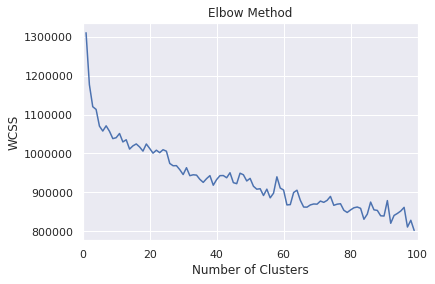

In [0]:
W2V_df=W2V_sentence_embedding(concat_df)
W2V_df=W2V_df[pd.isnull(W2V_df[0])==False]
elbow_plot_kmeans(W2V_df,W2V_df.columns,kmax=100,step=1,scaled=False)

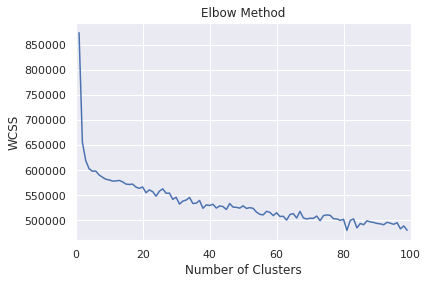

In [0]:
GloVe_df=GloVe_sentence_embedding(concat_df)
GloVe_df=GloVe_df[pd.isnull(GloVe_df[0])==False]
elbow_plot_kmeans(GloVe_df,GloVe_df.columns,kmax=100,step=1,scaled=False)

## Feature Engineering

In [0]:
def parallelize_dataframe(df, func, n_split):
    df_split = np.array_split(df, n_split)
    df_pool=func(df_split[0])
    for i in range(n_split-1):
      x=df_split[i+1]
      x=func(x.copy())
      df_pool = pd.concat([df_pool,x],ignore_index=True)
    return df_pool

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwa

Done n-grams


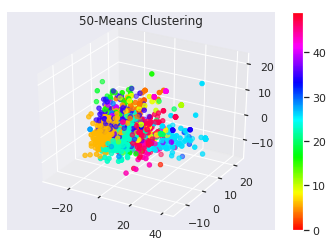

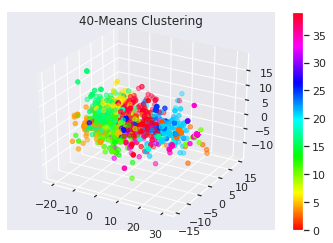


Finished in  2486.129671573639  seconds!


In [0]:
from google.colab import files
import time
start=time.time()
draft_engineered_df = parallelize_dataframe(concat_df, feature_engineering_split,n_split=4)
engineered_df=feature_engineering(draft_engineered_df,k_W2V=50,k_GloVe=40)
end=time.time()
print('')
print('Finished in ',end-start,' seconds!')

engineered_df.to_csv('df_prepared_Minus_NER.csv') 

In [0]:
files.download('df_prepared_Minus_NER.csv')